In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# SLR

Intercept: c: 6.77540513780003
Coefficient: m: slope : [0.05699632]
R-squared:  0.8166625652470733
Mean Squared Error:  5.840420435415039


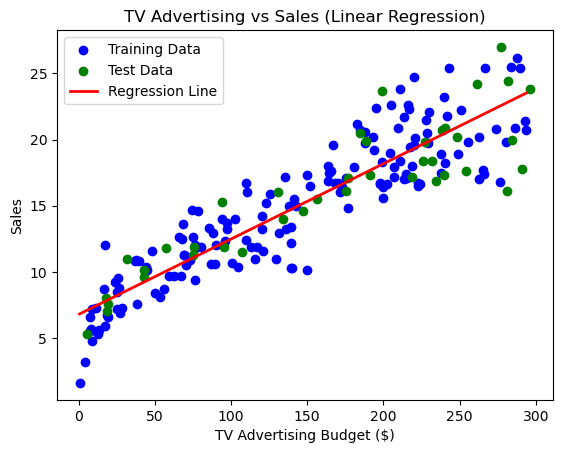

In [25]:


# Load the dataset (update the path as needed)
data = pd.read_csv("advertising.csv")  # Replace with your actual file path

# Extract relevant columns
x_ind = data[['TV']]  # Independent variable (TV advertising)
y_dep = data['Sales']  # Dependent variable (Sales)

X_train,X_test, y_train, y_test = train_test_split(x_ind, y_dep, test_size = 0.2)

my_regression = LinearRegression()
my_regression.fit(X_train,y_train)

m = my_regression.coef_  # Slope
c = my_regression.intercept_  # Intercept

print('Intercept: c:', c)
print('Coefficient: m: slope :', m)
print("R-squared: ", my_regression.score(X_train, y_train))
y_hat = my_regression.predict(X_test)
mean_sq_err = metrics.mean_squared_error(y_test, y_hat)
print("Mean Squared Error: ", mean_sq_err)



# Generate x values for the regression line
x_range = np.linspace(X_train.min(), X_train.max(), 100)  # Create evenly spaced points
y_range = m * x_range + c  # Compute corresponding y values

# Plot the data points
plt.scatter(X_train, y_train, color='blue', label="Training Data")
plt.scatter(X_test, y_test, color='green', label="Test Data")

# Plot the regression line
plt.plot(x_range, y_range, color='red', linewidth=2, label="Regression Line")

# Labels and title
plt.xlabel("TV Advertising Budget ($)")
plt.ylabel("Sales")
plt.title("TV Advertising vs Sales (Linear Regression)")
plt.legend()
plt.show()

# Bias and Variance

In [26]:
y_hat_train = my_regression.predict(X_train)  # Predictions for training data

# Compute Bias
bias = (np.mean(y_hat) - np.mean(y_test))**2

# Compute Variance
variance = np.var(y_hat)

print(f"Bias: {bias:.4f}")
print(f"Variance: {variance:.4f}")

Bias: 0.0166
Variance: 26.8376


# SLR + Scaling

If we apply StandardScaler before splitting, it will compute the mean and standard deviation using the entire dataset (X_ind), including the test set. However, in a real-world scenario, the test set should remain unseen during training, and using its statistics would leak information from the test set into the training process.

1. Why Do We Fit on X_train Only?

Fitting (fit_transform) computes the mean and standard deviation from X_train and then scales it.

We want to ensure that the test set (X_test) is scaled using the same statistics from the training set.

This ensures that the model generalizes well to unseen data.

2. Why Do We Not Fit on X_test?

If we also fit the scaler separately on X_test, it would compute a different mean and standard deviation, leading to different scales.

This would invalidate the model, as it was trained on data standardized using X_train's statistics.

Instead, we only transform X_test using the parameters (mean & standard deviation) learned from X_train.

Intercept (c): 15.330625000000003
Coefficient (m) after scaling: 4.669146844223774
R-squared:  0.8134866044709264
Mean Squared Error:  6.101072906773964
Bias: 0.0306
Variance: 25.1355


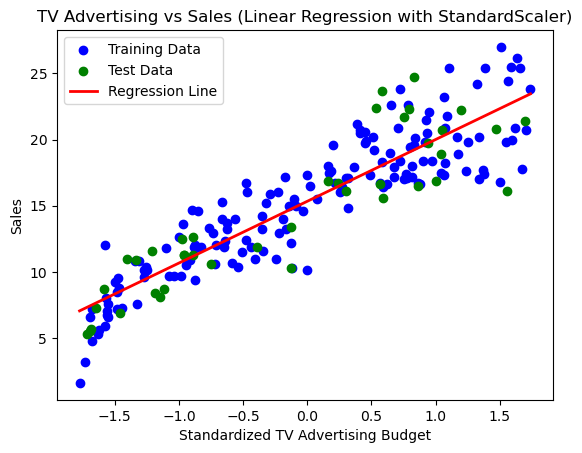

In [27]:
# Extract relevant columns
x_ind = data[['TV']]  # Independent variable (TV advertising)
y_dep = data['Sales']  # Dependent variable (Sales)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_ind, y_dep, test_size=0.2, random_state=42)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit & transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data (DO NOT fit again!)

# Train the linear regression model on scaled data
my_regression = LinearRegression()
my_regression.fit(X_train_scaled, y_train)

# Predictions
y_hat_train = my_regression.predict(X_train_scaled)  # Predictions for training data
y_hat_test = my_regression.predict(X_test_scaled)  # Predictions for test data

# Compute Bias
bias = (np.mean(y_hat_test) - np.mean(y_test))**2

# Compute Variance
variance = np.var(y_hat_test)

# Mean Squared Error
mean_sq_err = metrics.mean_squared_error(y_test, y_hat_test)

# Print values
print('Intercept (c):', my_regression.intercept_)
print('Coefficient (m) after scaling:', my_regression.coef_[0])
print("R-squared: ", my_regression.score(X_train_scaled, y_train))
print("Mean Squared Error: ", mean_sq_err)
print(f"Bias: {bias:.4f}")
print(f"Variance: {variance:.4f}")

# Plot results
plt.scatter(X_train_scaled, y_train, color='blue', label="Training Data")
plt.scatter(X_test_scaled, y_test, color='green', label="Test Data")

# Generate predictions for visualization
x_range_scaled = np.linspace(X_train_scaled.min(), X_train_scaled.max(), 100).reshape(-1, 1)
y_range_pred = my_regression.predict(x_range_scaled)

plt.plot(x_range_scaled, y_range_pred, color='red', linewidth=2, label="Regression Line")

# Labels and title
plt.xlabel("Standardized TV Advertising Budget")
plt.ylabel("Sales")
plt.title("TV Advertising vs Sales (Linear Regression with StandardScaler)")
plt.legend()
plt.show()

# MLR

Intercept (c): 15.330625000000003
Coefficients (m): [4.58720774 1.48984025 0.08791597]
R-squared: 0.9059
Mean Squared Error: 2.9078
Bias: 0.1588
Variance: 27.9663


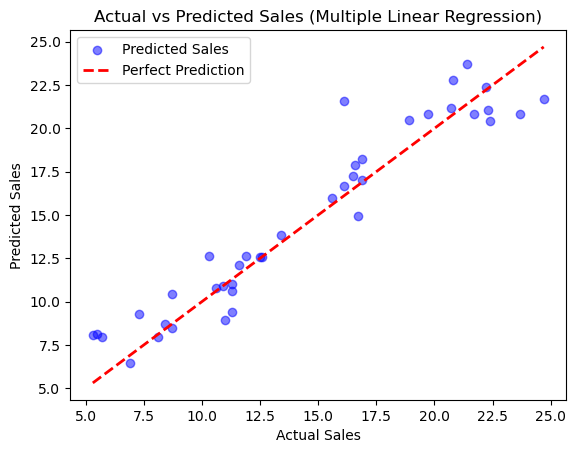

In [28]:
# Load the dataset
data = pd.read_csv("advertising.csv")  # Replace with your actual file path

# Extract independent (X) and dependent (y) variables
X = data[['TV', 'Radio', 'Newspaper']]  # Independent variables (predictors)
y = data['Sales']  # Dependent variable (target)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (recommended for MLR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit & transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data

# Train the Multiple Linear Regression model
mlr = LinearRegression()
mlr.fit(X_train_scaled, y_train)

# Get model coefficients
coefficients = mlr.coef_
intercept = mlr.intercept_

# Predictions
y_train_pred = mlr.predict(X_train_scaled)  # Predictions for training data
y_test_pred = mlr.predict(X_test_scaled)  # Predictions for test data

# Compute Bias
bias = (np.mean(y_test_pred) - np.mean(y_test))**2

# Compute Variance
variance = np.var(y_test_pred)

# Evaluate Model Performance
r_squared = mlr.score(X_test_scaled, y_test)
mse = metrics.mean_squared_error(y_test, y_test_pred)

# Print results
print(f'Intercept (c): {intercept}')
print(f'Coefficients (m): {coefficients}')
print(f"R-squared: {r_squared:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Bias: {bias:.4f}")
print(f"Variance: {variance:.4f}")

# Scatter Plot: Actual vs Predicted Sales
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, label="Predicted Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label="Perfect Prediction")

# Labels, title, and legend
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Multiple Linear Regression)")
plt.legend()  # Add legend
plt.show()

# MLR + PCA

Intercept (c): 15.330625000000001
Coefficient (m) after PCA: -4.669146844223772
R-squared:  0.8134866044709264
Mean Squared Error:  6.101072906773965
Bias: 0.0306
Variance: 25.1355


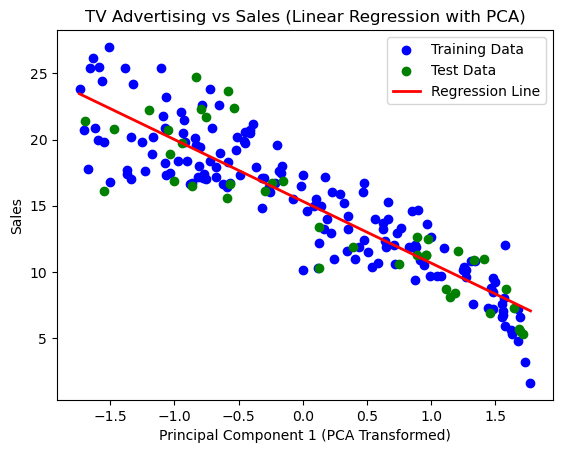

In [29]:
# Extract relevant columns
X = data[['TV', 'Radio', 'Newspaper']]  # Independent variable (TV advertising)
y_dep = data['Sales']  # Dependent variable (Sales)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_ind, y_dep, test_size=0.2, random_state=42)

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit & transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data

# Apply PCA (reduce to 1 component since we have only 1 feature)
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_scaled)  # Fit & transform training data
X_test_pca = pca.transform(X_test_scaled)  # Transform test data

# Train the linear regression model
my_regression = LinearRegression()
my_regression.fit(X_train_pca, y_train)

# Predictions
y_hat_train = my_regression.predict(X_train_pca)  # Predictions for training data
y_hat_test = my_regression.predict(X_test_pca)  # Predictions for test data

# Compute Bias
bias = (np.mean(y_hat_test) - np.mean(y_test))**2

# Compute Variance
variance = np.var(y_hat_test)

# Mean Squared Error
mean_sq_err = metrics.mean_squared_error(y_test, y_hat_test)

# Print values
print('Intercept (c):', my_regression.intercept_)
print('Coefficient (m) after PCA:', my_regression.coef_[0])
print("R-squared: ", my_regression.score(X_train_pca, y_train))
print("Mean Squared Error: ", mean_sq_err)
print(f"Bias: {bias:.4f}")
print(f"Variance: {variance:.4f}")

# Plot results
plt.scatter(X_train_pca, y_train, color='blue', label="Training Data")
plt.scatter(X_test_pca, y_test, color='green', label="Test Data")

# Generate predictions for visualization
x_range_pca = np.linspace(X_train_pca.min(), X_train_pca.max(), 100).reshape(-1, 1)
y_range_pred = my_regression.predict(x_range_pca)

plt.plot(x_range_pca, y_range_pred, color='red', linewidth=2, label="Regression Line")

# Labels and title
plt.xlabel("Principal Component 1 (PCA Transformed)")
plt.ylabel("Sales")
plt.title("TV Advertising vs Sales (Linear Regression with PCA)")
plt.legend()
plt.show()

# Regularization models

In [33]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
#import ace_tools as tools  # Required for table display

# Extract independent (X) and dependent (y) variables
X = data[['TV']]  # Independent variable (TV advertising)
y = data['Sales']  # Dependent variable (Sales)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (recommended for regularization models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit & transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data

# Define models with regularization strength (alpha)
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression (α=0.1)": Lasso(alpha=0.1),
    "Ridge Regression (α=1)": Ridge(alpha=1),
    "Elastic Net (α=0.1, l1_ratio=0.5)": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

# Store results
results = []

for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_hat_test = model.predict(X_test_scaled)

    # Compute metrics
    r_squared = model.score(X_test_scaled, y_test)
    mse = metrics.mean_squared_error(y_test, y_hat_test)
    bias = (np.mean(y_hat_test) - np.mean(y_test))**2
    variance = np.var(y_hat_test)

    # Store results
    results.append([name, r_squared, mse, bias, variance])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R-squared", "MSE", "Bias", "Variance"])

from IPython.display import display
display(results_df)


,Model,R-squared,MSE,Bias,Variance
0,Linear Regression,0.802561,6.101073,0.030554,25.135494
1,Lasso Regression (α=0.1),0.802189,6.112568,0.037050,24.070361
2,Ridge Regression (α=1),0.802532,6.101968,0.032373,24.824222
3,"Elastic Net (α=0.1, l1_ratio=0.5)",0.799799,6.186441,0.049526,22.312966


# Regularization in MLR

In [35]:
X = data[['TV', 'Radio', 'Newspaper']]  # Independent variable (TV advertising)
y = data['Sales']  # Dependent variable (Sales)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (recommended for regularization models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit & transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data

# Define models with regularization strength (alpha)
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression (α=0.1)": Lasso(alpha=0.1),
    "Ridge Regression (α=1)": Ridge(alpha=1),
    "Elastic Net (α=0.1, l1_ratio=0.5)": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

# Store results
results = []

for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_hat_test = model.predict(X_test_scaled)

    # Compute metrics
    r_squared = model.score(X_test_scaled, y_test)
    mse = metrics.mean_squared_error(y_test, y_hat_test)
    bias = (np.mean(y_hat_test) - np.mean(y_test))**2
    variance = np.var(y_hat_test)

    # Store results
    results.append([name, r_squared, mse, bias, variance])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R-squared", "MSE", "Bias", "Variance"])

from IPython.display import display
display(results_df)


,Model,R-squared,MSE,Bias,Variance
0,Linear Regression,0.905901,2.907757,0.158805,27.966334
1,Lasso Regression (α=0.1),0.905177,2.930148,0.156560,26.444777
2,Ridge Regression (α=1),0.905656,2.915318,0.162244,27.639761
3,"Elastic Net (α=0.1, l1_ratio=0.5)",0.901337,3.048785,0.184734,24.801262
